In [1]:
import platform
# 使用しているOSを表示
platform.platform()

'macOS-10.15.7-x86_64-i386-64bit'

In [2]:
# pythonのversionを表示
!python -V

Python 3.8.11


In [3]:
import pandas as pd
# pdと略すのが一般的
# pandasのversionを表示
pd.__version__

'1.1.3'

In [4]:
from rdkit import rdBase, Chem
from rdkit.Chem import Descriptors, Draw
from rdkit.ML.Descriptors import MoleculeDescriptors
print(rdBase.rdkitVersion)

2019.09.3


RDKit WARNING: [13:19:43] Enabling RDKit 2019.09.3 jupyter extensions
[13:19:43] Enabling RDKit 2019.09.3 jupyter extensions


# 複数分子の読み込み

In [5]:
suppl = Chem.SDMolSupplier('data/PubChem_TCI_phenol_records.sdf')

In [6]:
mols_sdf = [mol for mol in suppl]

In [7]:
len(suppl)

117

# Smartsによる部分構造検索

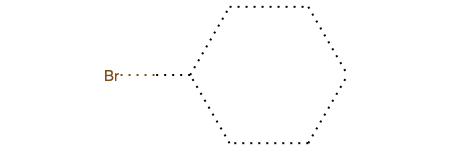

In [8]:
# patt = Chem.MolFromSmarts('')
patt = Chem.MolFromSmarts('c1cc([Br])ccc1')
patt

In [9]:
matches = [x for x in mols_sdf if x.HasSubstructMatch(patt)]

In [10]:
from rdkit.Chem import MolStandardize

lfc = MolStandardize.fragment.LargestFragmentChooser()

mols = [mol for mol in matches]
mols = [lfc.choose(mol) for mol in mols ]
mols = [Chem.AddHs(mol, addCoords=True) for mol in mols ]

In [11]:
len(mols)

10

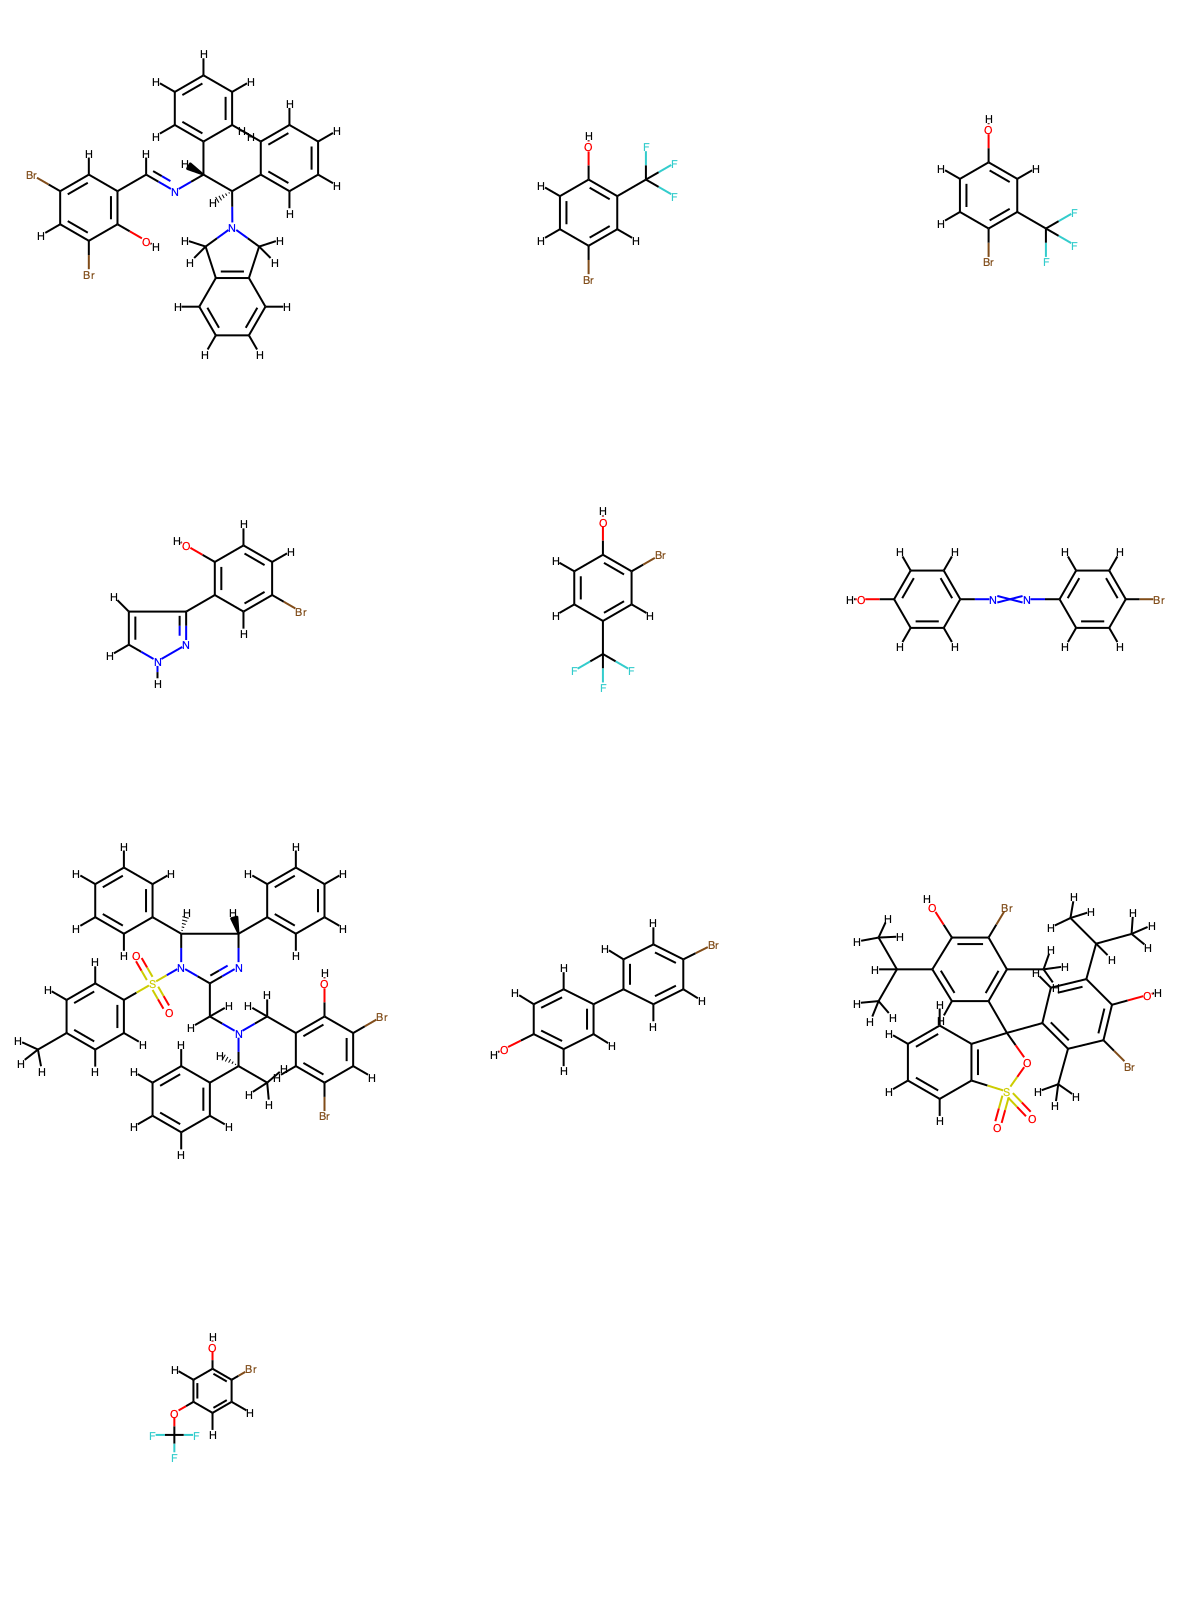

In [12]:
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(400,400))

# Smartsの書き方の参考文献

参考文献

- SMARTS - A Language for Describing Molecular Patterns<br>
https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html

- SMILES記法は化学構造の線形表記法<br>
https://future-chem.com/smiles-smarts/

- SMARTS記法とRDKitの化学反応で遊んだ話 <br>
https://magattaca.hatenablog.com/entry/2019/02/10/194853